In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('airnb.csv',encoding_errors='ignore')

In [5]:
df.shape

(20770, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

### Data Cleaning

In [7]:
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [4]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [12]:
df.duplicated().sum()

12

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [16]:
df.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [6]:
df.id = df.id.astype(object)
df.host_id=df.host_id.astype(object)

In [8]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

### Data Exploration

##### Price distribution

<Axes: ylabel='price'>

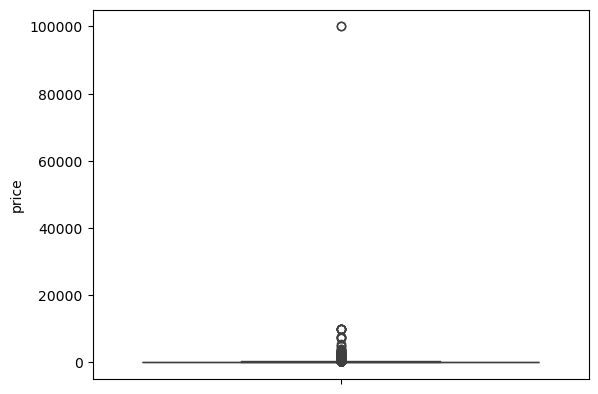

In [19]:
sns.boxplot(data=df, y='price')

<Axes: ylabel='price'>

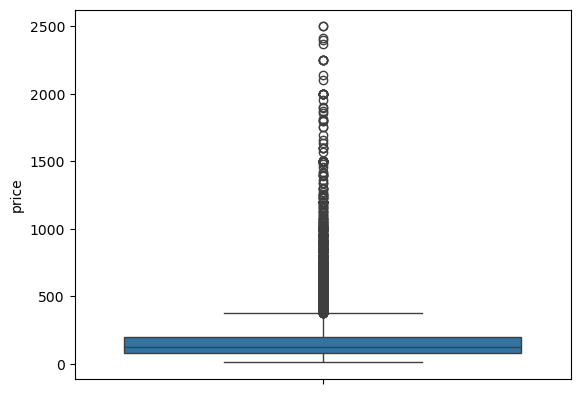

In [7]:
priceWithoutOutlier = df[df.price < 2500]
sns.boxplot(data=priceWithoutOutlier, y='price')

<Axes: xlabel='price', ylabel='Count'>

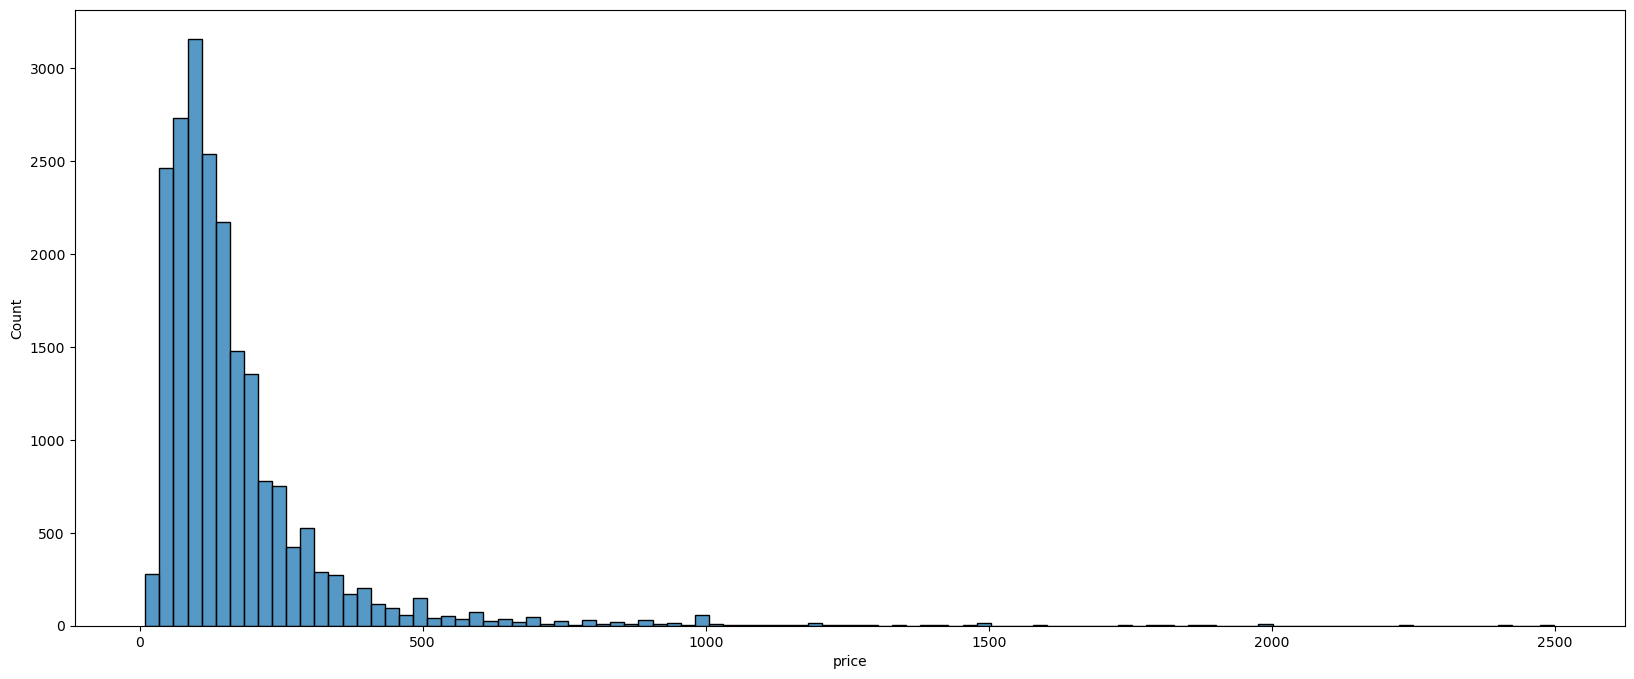

In [32]:
plt.figure(figsize = (20,8))
sns.histplot(data=priceWithoutOutlier,x='price',bins=100)

##### Availability

In [37]:
(df.availability_365==0).value_counts()

availability_365
False    18244
True      2480
Name: count, dtype: int64

<Axes: xlabel='availability_365', ylabel='Count'>

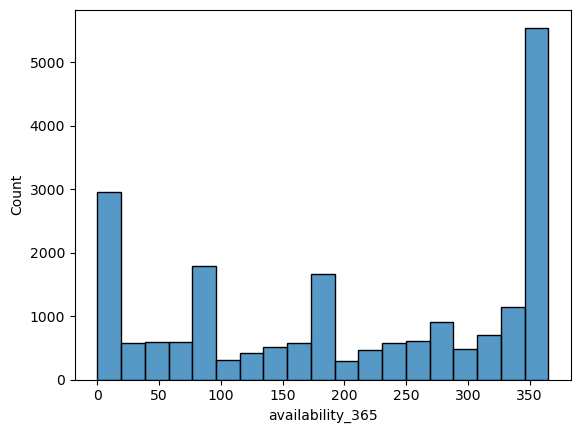

In [41]:
sns.histplot(data=df,x='availability_365')

In [8]:
host_listing = df.groupby('host_name').size().reset_index(name='number_of_listing').sort_values(by='number_of_listing',ascending=False)

In [9]:
toptenhost=host_listing.head(10)

In [10]:
toptenhost

,host_name,number_of_listing
2441,Jeniffer,184
5407,Urban Furnished,176
3621,Michael,148
1226,David,143
5034,Stay With Vibe,113
694,Blueground,107
3397,Maria,98
2112,Hiroki,87
1183,Daniel,87
168,Alex,86


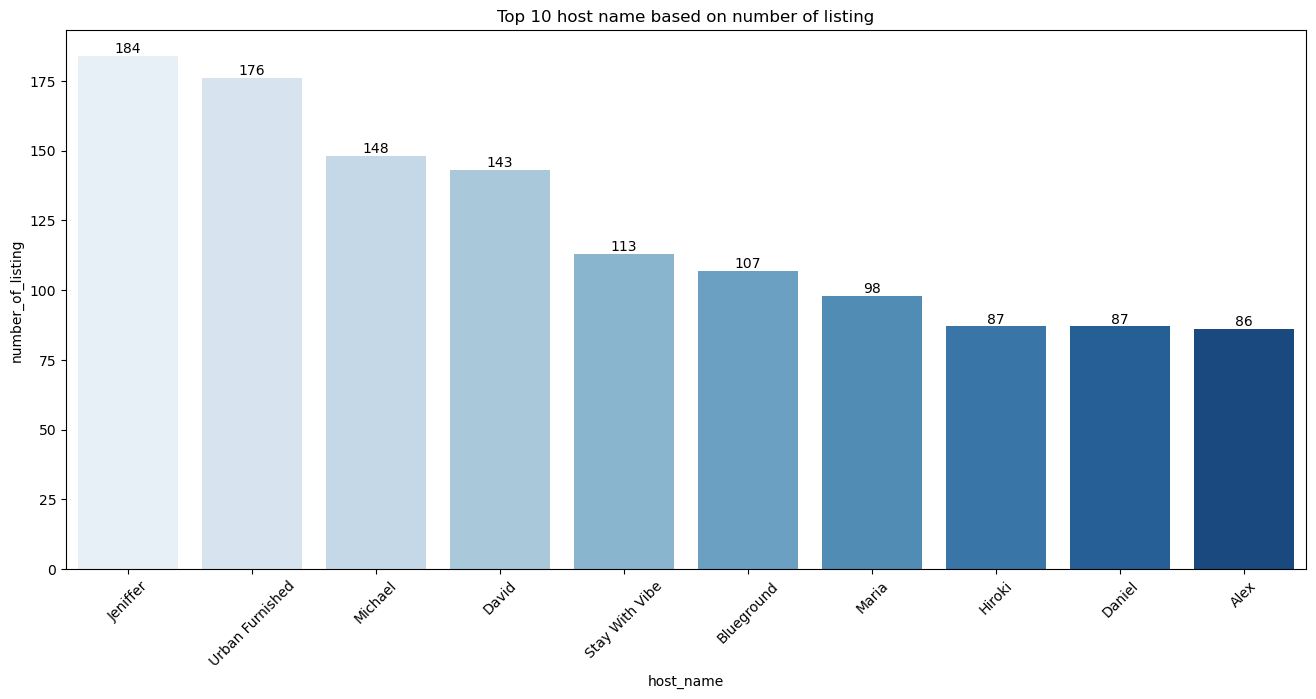

In [11]:
plt.figure(figsize=(16,7))
bx=sns.barplot(data=toptenhost,x='host_name',y='number_of_listing',palette='Blues')
for bars in bx.containers:
    bx.bar_label(bars)
plt.title('Top 10 host name based on number of listing')
plt.xticks(rotation=45)
plt.show()

In [18]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price per bed'],
      dtype='object')

In [26]:
df.minimum_nights.sort_values(ascending=False)

3388     1250.0
11226    1124.0
11313    1000.0
2018     1000.0
2700     1000.0
          ...  
16981       1.0
16985       1.0
3410        1.0
16999       1.0
20769       1.0
Name: minimum_nights, Length: 20724, dtype: float64

Text(0.5, 1.0, 'Price vs minimum_nights')

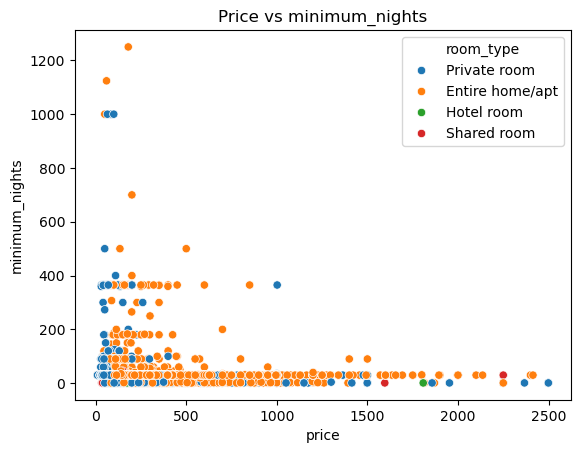

In [28]:
sns.scatterplot(data=priceWithoutOutlier,x='price',y='minimum_nights',hue='room_type')
plt.title('Price vs minimum_nights')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20724 entries, 0 to 20769
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20724 non-null  object 
 1   name                            20724 non-null  object 
 2   host_id                         20724 non-null  object 
 3   host_name                       20724 non-null  object 
 4   neighbourhood_group             20724 non-null  object 
 5   neighbourhood                   20724 non-null  object 
 6   latitude                        20724 non-null  float64
 7   longitude                       20724 non-null  float64
 8   room_type                       20724 non-null  object 
 9   price                           20724 non-null  float64
 10  minimum_nights                  20724 non-null  float64
 11  number_of_reviews               20724 non-null  float64
 12  last_review                     20724

In [13]:
df['last_review']=pd.to_datetime(df.last_review)
df['review_year']=df.last_review.dt.year

In [14]:
review_per_year=df.groupby('review_year')['number_of_reviews_ltm'].sum()
review_per_year

review_year
2011         0.0
2012         0.0
2013         0.0
2014         0.0
2015         0.0
2016         0.0
2017         0.0
2018         0.0
2019         0.0
2020         0.0
2021         0.0
2022         0.0
2023    205899.0
2024     18842.0
Name: number_of_reviews_ltm, dtype: float64

Text(0.5, 1.0, 'How have reviews changed over the years?')

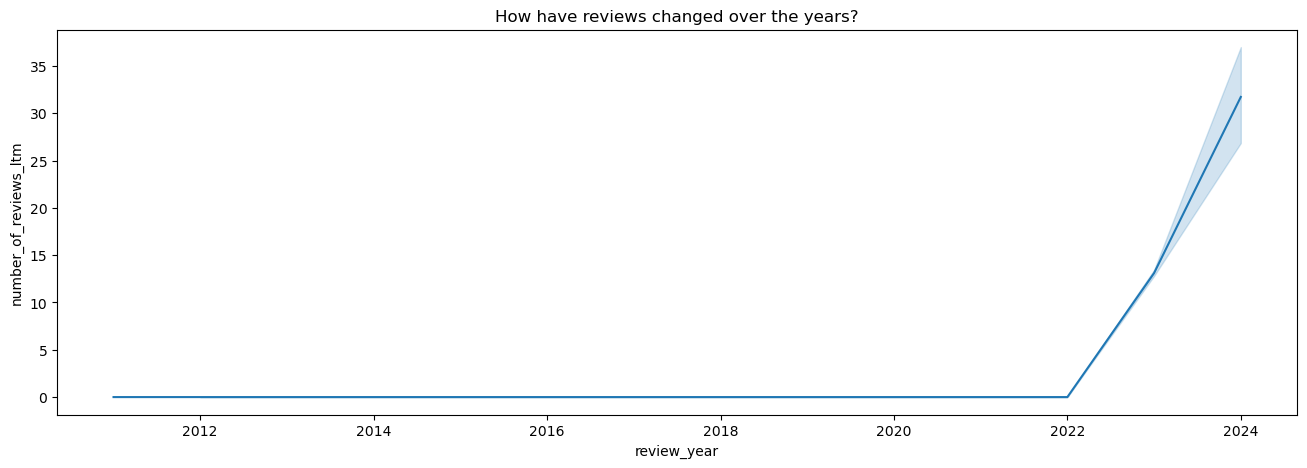

In [15]:
plt.figure(figsize = (16,5))
sns.lineplot(data=df,x='review_year',y='number_of_reviews_ltm')
plt.title('How have reviews changed over the years?')

In [42]:
pd.set_option('display.max_columns',None)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed,review_year
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30.0,3.0,2015-12-20,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0,2015
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30.0,9.0,2023-01-05,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0,2023
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2.0,6.0,2023-12-18,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5,2023
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30.0,156.0,2023-09-17,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0,2023
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30.0,11.0,2023-03-12,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0,2023


#### Feature engineering

In [10]:
df['price per bed'] = df.price/df.beds

In [53]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


##### Neighbourhood_Groups

In [11]:
ng = round(df.groupby(['neighbourhood_group','room_type'])['price'].mean(),1).reset_index()
ng

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,149.0
1,Bronx,Private room,97.3
2,Bronx,Shared room,87.3
3,Brooklyn,Entire home/apt,210.9
4,Brooklyn,Hotel room,162.8
5,Brooklyn,Private room,161.9
6,Brooklyn,Shared room,106.1
7,Manhattan,Entire home/apt,253.4
8,Manhattan,Hotel room,442.3
9,Manhattan,Private room,163.4


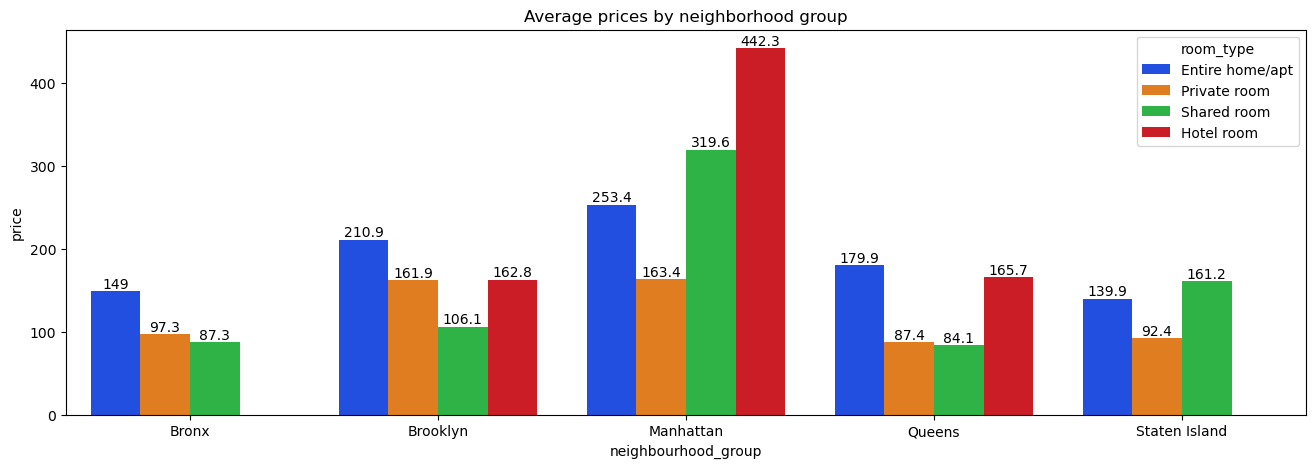

In [64]:
plt.figure(figsize=(16,5))
ax=sns.barplot(data=ng,x='neighbourhood_group',y='price',hue='room_type',palette='bright')
plt.title('Average prices by neighborhood group')
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: title={'center': 'Locality and Review Dependency'}, xlabel='price', ylabel='number_of_reviews'>

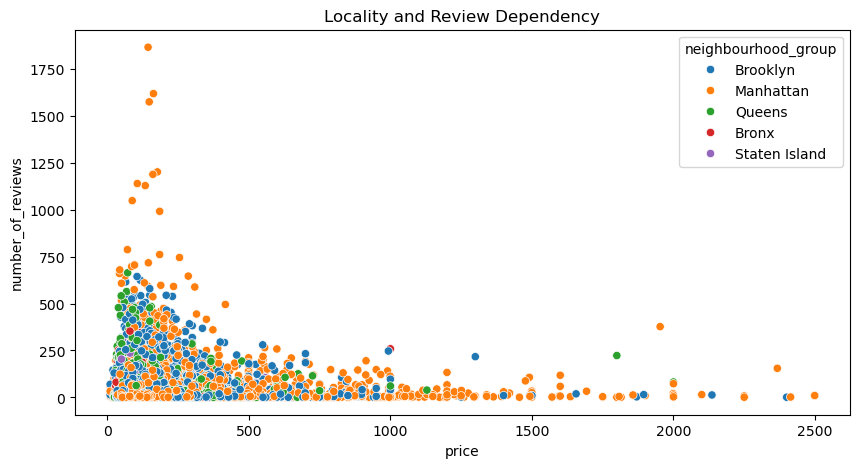

In [70]:
plt.figure(figsize = (10,5))
plt.title('Locality and Review Dependency')
sns.scatterplot(data=priceWithoutOutlier,x='price',y='number_of_reviews',hue='neighbourhood_group')

In [71]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price per bed'],
      dtype='object')

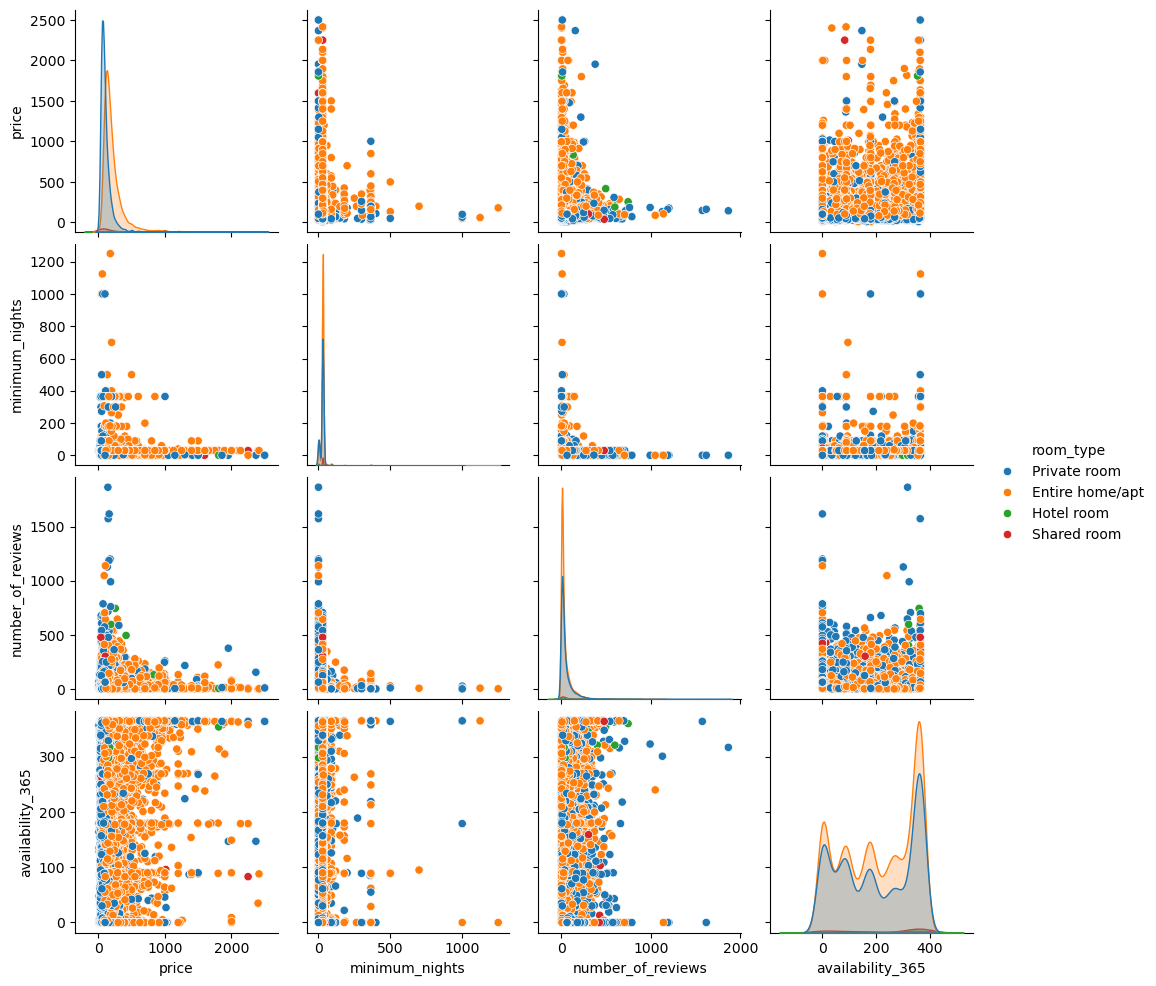

In [74]:
sns.pairplot(data=priceWithoutOutlier,vars=['price','minimum_nights','number_of_reviews','availability_365'],hue='room_type')

Text(0.5, 1.0, 'Geographical Distribution of AirBnb')

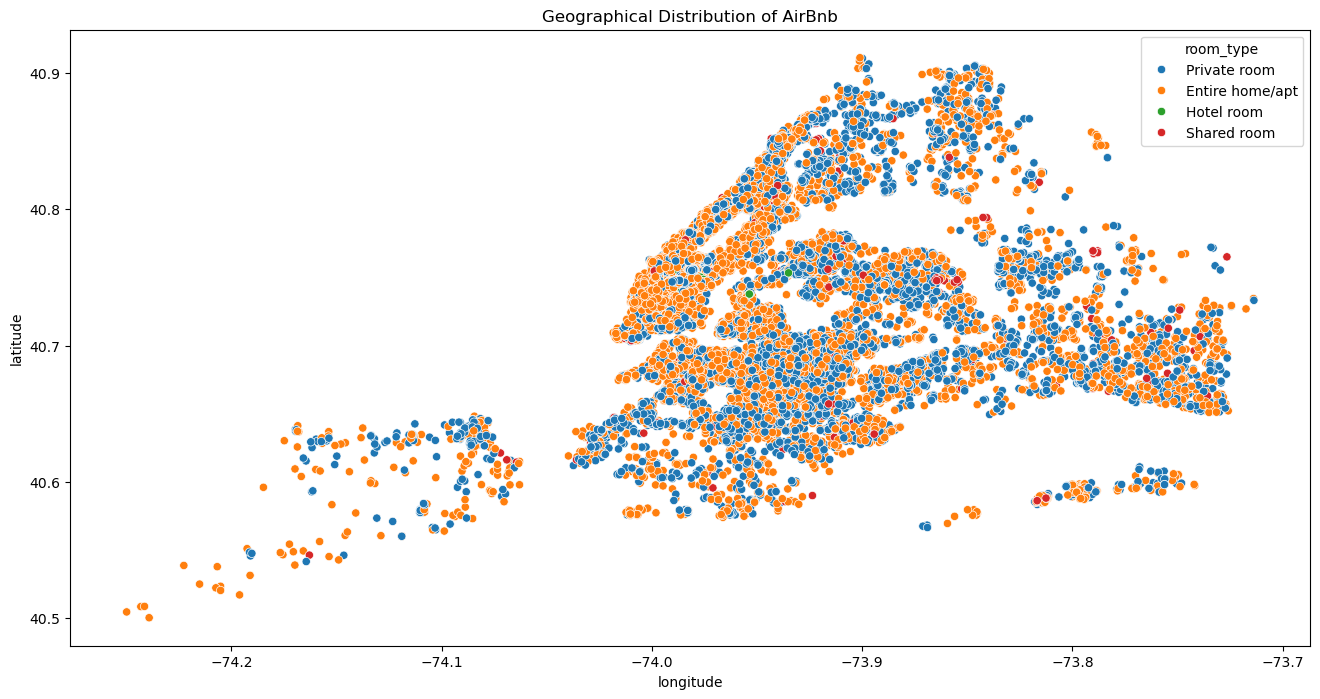

In [77]:
plt.figure(figsize = (16,8))
sns.scatterplot(data=df,x='longitude',y='latitude',hue='room_type')
plt.title('Geographical Distribution of AirBnb')

In [78]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price per bed'],
      dtype='object')

### Multivariate analysis

<Axes: >

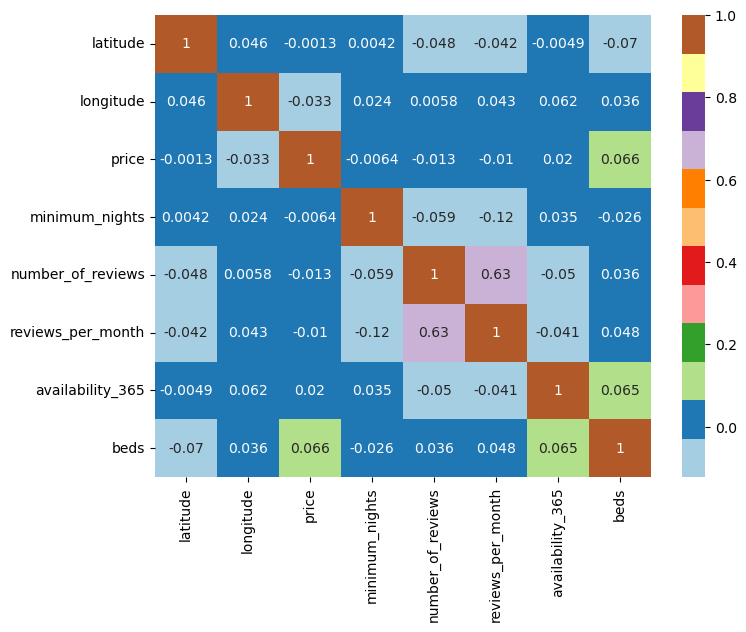

In [88]:
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'beds']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr, annot=True,cmap='Paired')